### Step:1 Merging multiple attack and normal files

In [ ]:
import pandas as pd
import os
import numpy as np

# Path where the uploaded Excel files are stored in Colab
# You can use the exact path where you have uploaded them in Colab (usually inside '/content/')
path = '/content/'  # Replace with your directory if different

# List all Excel files in the directory
excel_files = [file for file in os.listdir(path) if file.endswith('.xlsx')]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through the list of Excel files and read each one
for file in excel_files:
    file_path = os.path.join(path, file)
    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path)
    # Optionally, add a column to track the file name if needed
    df['source_file'] = file
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)


### Data Augmentation

In [ ]:
merged_df = merged_df.loc[merged_df.index.repeat(4)].reset_index(drop=True)
exclude_cols = ['trojan_present', 'source_file', 'victim_location', 'no_of_trojan', 'trojan_location_1', 'trojan_location_2', 'injection_rate']

# Get the list of numerical features to augment
numerical_features = [col for col in merged_df.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(merged_df[col])]

for feature in numerical_features:
    merged_df[feature] = merged_df[feature] * (1 + np.random.uniform(-0.05, 0.05, size=len(merged_df)))

### Displaying the complete dataframe generated by GarNET simulator

In [ ]:
pd.set_option('display.max_rows', None)

merged_df

average_flit_latency  average_packet_latency  \
0              1680.741906             2531.521932   
1              1728.205991             2345.172013   
2              1746.112200             2429.317006   
3              1676.067793             2469.079457   
4              1969.026352             1819.900683   
5              1942.113771             1814.091412   
6              1834.245460             1797.208307   
7              1931.547394             1879.443747   
8              2898.287187             2324.320859   
9              2813.942967             2373.567435   
10             3066.652163             2518.128740   
11             2814.057040             2416.837939   
12             3121.156443             2613.318034   
13             2925.218232             2726.145353   
14             3079.515134             2878.318370   
15             3126.881655             2790.129679   
16             4664.409907             3988.646735   
17             4568.199782             3860.577349   
18             4395.360654             4093.828820   
19             4255.374591             3922.774445   
20             5373.410369             4467.852208   
21             5583.780178             4563.559801   
22             5367.342847             4416.397491   
23             5612.809919             4149.051053   
24             5848.192516             5037.044510   
25             5823.328660             5174.649876   
26             5709.806983             5053.066324   
27             6229.502195             4902.748609   
28             6208.514108             5127.697742   
29             6175.556067             5328.566369   
30             6058.989286             5115.156812   
31             6399.678318             5057.667394   
32             1654.076959             2525.177366   
33             1645.012892             2372.986031   
34             1682.500787             2332.977546   
35             1661.500485             2501.423953   
36             1045.798239             1489.213837   
37             1078.727130             1391.543862   
38             1045.240321             1410.358321   
39             1024.883732             1372.598341   
40             2929.043831             1758.906412   
41             2714.183540             1812.775586   
42             2880.711671             1764.255090   
43             2733.944367             1873.702694   
44             4461.941995             1973.990255   
45             4041.493791             2149.006763   
46             4112.201885             2119.909075   
47             4280.675414             2112.590594   
48             4540.343767             1998.409074   
49             4651.859040             2027.754987   
50             4278.483969             2167.968365   
51             4385.625599             2119.024733   
52             6796.334196             4103.191060   
53             6566.523805             3923.751807   
54             7068.553837             3885.530841   
55             6586.030444             4005.679191   
56             8307.449529             5578.744636   
57             8718.481794             5816.045683   
58             8570.788547             5512.299251   
59             8699.304499             5565.079868   
60             9856.626953             6858.502180   
61             9387.001770             6672.670747   
62             9663.446986             6833.246878   
63             9640.465924             6643.149345   
64             1802.115793             2475.529642   
65             1904.166901             2539.178998   
66             1912.671045             2482.641269   
67             1904.011593             2526.746524   
68             1067.463797             1472.067446   
69             1051.400081             1504.324907   
70             1116.496493             1423.611093   
71             1047.802673             1499.228138   
72             2898.021292             1983.089751   
73        

### Exploratory Data Analysis

In [ ]:
merged_df.columns

Index(['average_flit_latency', 'average_packet_latency',
       'average_packet_queueing_latency', 'average_flit_queueing_latency',
       'packets_injected::total', 'packets_received::total',
       'flits_injected::total', 'flits_received::total', 'average_hops',
       'avg_link_utilization', 'routers00.crossbar_activity',
       'routers01.crossbar_activity', 'routers02.crossbar_activity',
       'routers03.crossbar_activity', 'routers04.crossbar_activity',
       'routers05.crossbar_activity', 'routers06.crossbar_activity',
       'routers07.crossbar_activity', 'routers08.crossbar_activity',
       'routers09.crossbar_activity', 'routers10.crossbar_activity',
       'routers11.crossbar_activity', 'routers12.crossbar_activity',
       'routers13.crossbar_activity', 'routers14.crossbar_activity',
       'routers15.crossbar_activity', 'routers16.crossbar_activity',
       'routers17.crossbar_activity', 'routers18.crossbar_activity',
       'routers19.crossbar_activity', 'routers20.cr

In [ ]:
merged_df.describe()

average_flit_latency  average_packet_latency  \
count           1024.000000             1024.000000   
mean            4647.758112             3187.514700   
std             3074.500023             2296.873380   
min               14.579614               14.513890   
25%             1924.098783             1831.673940   
50%             4390.653810             2374.137464   
75%             6052.976476             3990.191699   
max            14360.582675            12071.308985   

       average_packet_queueing_latency  average_flit_queueing_latency  \
count                      1024.000000                    1024.000000   
mean                       3120.623976                    4538.467792   
std                        2271.428644                    3032.600811   
min                           1.915697                       1.906301   
25%                        1764.839861                    1826.307209   
50%                        2322.582889                    4290.880184   
75%                        3899.138603                    5972.057954   
max                       11720.944144                   14173.717144   

       packets_injected::total  packets_received::total  \
count              1024.000000              1024.000000   
mean             480711.256502            480398.220366   
std              173067.564270            173665.226993   
min              155543.996690            153579.457608   
25%              350630.211311            349585.480323   
50%              473995.408695            473402.820002   
75%              611778.271614            607559.759369   
max              947733.429787            981869.398108   

       flits_injected::total  flits_received::total  average_hops  \
count           1.024000e+03           1.024000e+03   1024.000000   
mean            7.783145e+05           7.765907e+05      4.788239   
std             2.392390e+05           2.384122e+05      1.509520   
min             3.569467e+05           3.549076e+05      2.162567   
25%             5.782447e+05           5.760061e+05      3.772758   
50%             8.373458e+05           8.278083e+05      4.861532   
75%             9.454100e+05           9.502764e+05      5.530307   
max             1.323554e+06           1.334504e+06      8.395978   

       avg_link_utilization  ...  routers59.crossbar_activity  \
count           1024.000000  ...                  1024.000000   
mean             101.889600  ...                 60830.976925   
std               30.174459  ...                 30245.767471   
min               40.778112  ...                  9460.423463   
25%               83.121980  ...                 36476.856165   
50%               98.249980  ...                 60873.739951   
75%              113.300562  ...                 86534.603971   
max              184.659495  ...                124230.604014   

       routers60.crossbar_activity  routers61.crossbar_activity  \
count                  1024.000000                  1024.000000   
mean                  65258.348017                 58459.042481   
std                   30141.541848                 24948.050792   
min                   14663.409463                 18619.322758   
25%                   37957.392235                 39806.285072   
50%                   62234.071452                 50592.393598   
75%                   91779.674550                 75159.933015   
max                  123372.260264                106952.491348   

       routers62.crossbar_activity  routers63.crossbar_activity  \
count                  1024.000000                  1024.000000   
mean                  51327.165323                 41943.156850   
std                   23303.990850                 26529.659607   
min                    7912.302926                  3932.582064   
25%                   30865.546605                 18216.738266   
50%                   50374.167339                 38101.120506   
75%                   68447.813467      

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   average_flit_latency             1024 non-null   float64
 1   average_packet_latency           1024 non-null   float64
 2   average_packet_queueing_latency  1024 non-null   float64
 3   average_flit_queueing_latency    1024 non-null   float64
 4   packets_injected::total          1024 non-null   float64
 5   packets_received::total          1024 non-null   float64
 6   flits_injected::total            1024 non-null   float64
 7   flits_received::total            1024 non-null   float64
 8   average_hops                     1024 non-null   float64
 9   avg_link_utilization             1024 non-null   float64
 10  routers00.crossbar_activity      1024 non-null   float64
 11  routers01.crossbar_activity      1024 non-null   float64
 12  routers02.crossbar_a

Addition of new column which indicates whether an attack is happening or not

In [ ]:
merged_df['trojan_present'] = (merged_df['no_of_trojan'] > 0.0).astype(int)

In [ ]:
merged_df

average_flit_latency  average_packet_latency  \
0              1680.741906             2531.521932   
1              1728.205991             2345.172013   
2              1746.112200             2429.317006   
3              1676.067793             2469.079457   
4              1969.026352             1819.900683   
5              1942.113771             1814.091412   
6              1834.245460             1797.208307   
7              1931.547394             1879.443747   
8              2898.287187             2324.320859   
9              2813.942967             2373.567435   
10             3066.652163             2518.128740   
11             2814.057040             2416.837939   
12             3121.156443             2613.318034   
13             2925.218232             2726.145353   
14             3079.515134             2878.318370   
15             3126.881655             2790.129679   
16             4664.409907             3988.646735   
17             4568.199782             3860.577349   
18             4395.360654             4093.828820   
19             4255.374591             3922.774445   
20             5373.410369             4467.852208   
21             5583.780178             4563.559801   
22             5367.342847             4416.397491   
23             5612.809919             4149.051053   
24             5848.192516             5037.044510   
25             5823.328660             5174.649876   
26             5709.806983             5053.066324   
27             6229.502195             4902.748609   
28             6208.514108             5127.697742   
29             6175.556067             5328.566369   
30             6058.989286             5115.156812   
31             6399.678318             5057.667394   
32             1654.076959             2525.177366   
33             1645.012892             2372.986031   
34             1682.500787             2332.977546   
35             1661.500485             2501.423953   
36             1045.798239             1489.213837   
37             1078.727130             1391.543862   
38             1045.240321             1410.358321   
39             1024.883732             1372.598341   
40             2929.043831             1758.906412   
41             2714.183540             1812.775586   
42             2880.711671             1764.255090   
43             2733.944367             1873.702694   
44             4461.941995             1973.990255   
45             4041.493791             2149.006763   
46             4112.201885             2119.909075   
47             4280.675414             2112.590594   
48             4540.343767             1998.409074   
49             4651.859040             2027.754987   
50             4278.483969             2167.968365   
51             4385.625599             2119.024733   
52             6796.334196             4103.191060   
53             6566.523805             3923.751807   
54             7068.553837             3885.530841   
55             6586.030444             4005.679191   
56             8307.449529             5578.744636   
57             8718.481794             5816.045683   
58             8570.788547             5512.299251   
59             8699.304499             5565.079868   
60             9856.626953             6858.502180   
61             9387.001770             6672.670747   
62             9663.446986             6833.246878   
63             9640.465924             6643.149345   
64             1802.115793             2475.529642   
65             1904.166901             2539.178998   
66             1912.671045             2482.641269   
67             1904.011593             2526.746524   
68             1067.463797             1472.067446   
69             1051.400081             1504.324907   
70             1116.496493             1423.611093   
71             1047.802673             1499.228138   
72             2898.021292             1983.089751   
73        

In [ ]:
# Count occurrences of 0.0
count_0 = merged_df['trojan_present'].value_counts()[0]

# Count occurrences of 2.0
count_1 = merged_df['trojan_present'].value_counts()[1]

# Print the results
print(f"Count of 0.0: {count_0}")
print(f"Count of 2.0: {count_1}")

Count of 0.0: 128
Count of 2.0: 896


In [ ]:
merged_df.isnull().sum()

average_flit_latency                 0
average_packet_latency               0
average_packet_queueing_latency      0
average_flit_queueing_latency        0
packets_injected::total              0
packets_received::total              0
flits_injected::total                0
flits_received::total                0
average_hops                         0
avg_link_utilization                 0
routers00.crossbar_activity          0
routers01.crossbar_activity          0
routers02.crossbar_activity          0
routers03.crossbar_activity          0
routers04.crossbar_activity          0
routers05.crossbar_activity          0
routers06.crossbar_activity          0
routers07.crossbar_activity          0
routers08.crossbar_activity          0
routers09.crossbar_activity          0
routers10.crossbar_activity          0
routers11.crossbar_activity          0
routers12.crossbar_activity          0
routers13.crossbar_activity          0
routers14.crossbar_activity          0
routers15.crossbar_activity          0
routers16.crossbar_activity          0
routers17.crossbar_activity          0
routers18.crossbar_activity          0
routers19.crossbar_activity          0
routers20.crossbar_activity          0
routers21.crossbar_activity          0
routers22.crossbar_activity          0
routers23.crossbar_activity          0
routers24.crossbar_activity          0
routers25.crossbar_activity          0
routers26.crossbar_activity          0
routers27.crossbar_activity          0
routers28.crossbar_activity          0
routers29.crossbar_activity          0
routers30.crossbar_activity          0
routers31.crossbar_activity          0
routers32.crossbar_activity          0
routers33.crossbar_activity          0
routers34.crossbar_activity          0
routers35.crossbar_activity          0
routers36.crossbar_activity          0
routers37.crossbar_activity          0
routers38.crossbar_activity          0
routers39.crossbar_activity          0
routers40.crossbar_activity          0
routers41.crossbar_activity          0
routers42.crossbar_activity          0
routers43.crossbar_activity          0
routers44.crossbar_activity          0
routers45.crossbar_activity          0
routers46.crossbar_activity          0
routers47.crossbar_activity          0
routers48.crossbar_activity          0
routers49.crossbar_activity          0
routers50.crossbar_activity          0
routers51.crossbar_activity          0
routers52.crossbar_activity          0
routers53.crossbar_activity          0
routers54.crossbar_activity          0
routers55.crossbar_activity          0
routers56.crossbar_activity          0
routers57.crossbar_activity          0
routers58.crossbar_activity          0
routers59.crossbar_activity          0
routers60.crossbar_activity          0
routers61.crossbar_activity          0
routers62.crossbar_activity          0
routers63.crossbar_activity          0
injection_rate                       0
victim_location                    128
no_of_trojan                       128
trojan_location_1                  128
trojan_location_2                  128
source_file                          0
trojan_present                       0
dtype: int64

In [ ]:
average = (merged_df['trojan_present'] == 0).count()

# Print the result
print("Average of 'trojan_present':", average)

Average of 'trojan_present': 1024


### Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = merged_df.drop(['trojan_present', 'source_file','victim_location','no_of_trojan','trojan_location_1','trojan_location_2','injection_rate'], axis=1)

In [ ]:
y = merged_df['trojan_present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
X

average_flit_latency  average_packet_latency  \
0              1680.741906             2531.521932   
1              1728.205991             2345.172013   
2              1746.112200             2429.317006   
3              1676.067793             2469.079457   
4              1969.026352             1819.900683   
5              1942.113771             1814.091412   
6              1834.245460             1797.208307   
7              1931.547394             1879.443747   
8              2898.287187             2324.320859   
9              2813.942967             2373.567435   
10             3066.652163             2518.128740   
11             2814.057040             2416.837939   
12             3121.156443             2613.318034   
13             2925.218232             2726.145353   
14             3079.515134             2878.318370   
15             3126.881655             2790.129679   
16             4664.409907             3988.646735   
17             4568.199782             3860.577349   
18             4395.360654             4093.828820   
19             4255.374591             3922.774445   
20             5373.410369             4467.852208   
21             5583.780178             4563.559801   
22             5367.342847             4416.397491   
23             5612.809919             4149.051053   
24             5848.192516             5037.044510   
25             5823.328660             5174.649876   
26             5709.806983             5053.066324   
27             6229.502195             4902.748609   
28             6208.514108             5127.697742   
29             6175.556067             5328.566369   
30             6058.989286             5115.156812   
31             6399.678318             5057.667394   
32             1654.076959             2525.177366   
33             1645.012892             2372.986031   
34             1682.500787             2332.977546   
35             1661.500485             2501.423953   
36             1045.798239             1489.213837   
37             1078.727130             1391.543862   
38             1045.240321             1410.358321   
39             1024.883732             1372.598341   
40             2929.043831             1758.906412   
41             2714.183540             1812.775586   
42             2880.711671             1764.255090   
43             2733.944367             1873.702694   
44             4461.941995             1973.990255   
45             4041.493791             2149.006763   
46             4112.201885             2119.909075   
47             4280.675414             2112.590594   
48             4540.343767             1998.409074   
49             4651.859040             2027.754987   
50             4278.483969             2167.968365   
51             4385.625599             2119.024733   
52             6796.334196             4103.191060   
53             6566.523805             3923.751807   
54             7068.553837             3885.530841   
55             6586.030444             4005.679191   
56             8307.449529             5578.744636   
57             8718.481794             5816.045683   
58             8570.788547             5512.299251   
59             8699.304499             5565.079868   
60             9856.626953             6858.502180   
61             9387.001770             6672.670747   
62             9663.446986             6833.246878   
63             9640.465924             6643.149345   
64             1802.115793             2475.529642   
65             1904.166901             2539.178998   
66             1912.671045             2482.641269   
67             1904.011593             2526.746524   
68             1067.463797             1472.067446   
69             1051.400081             1504.324907   
70             1116.496493             1423.611093   
71             1047.802673             1499.228138   
72             2898.021292             1983.089751   
73        

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1
100     1
101     1
102     1
103     1
104     1
105     1
106     1
107     1
108     1
109     1
110     1
111     1
112     1
113     1
114     1
115     1
116     1
117     1
118     1
119     1
120     1
121     1
122     1
123     1
124     1
125     1
126     1
127     1
128     1
129     1
130     1
131     1
132     1
133     1
134     1
135     1
136     1
137     1
138     1
139     1
140     1
141     1
142     1
143     1
144     1
145     1
146     1
147     1
148     1
149     1
150     1
151     1
152     1
153     1
154     1
155     1
156     1
157     1
158     1
159     1
160     0
161     0
162     0
163     0
164     0
165     0
166     0
167     0
168     0
169     0
170     0
171     0
172     0
173     0
174     0
175     0
176     0
177     0
178     0
179     0
180     0
181     0
182     0
183     0
184     0
185     0
186     0
187     0
188     0
189     0
190     0
191     0
192     1
193     1
194     1
195     1
196     1
197     1
198     1
199     1
200     1
201     1
202     1
203     1
204     1
205     1
206     1
207     1
208     1
209     1
210     1
211     1
212     1
213     1
214     1
215     1
216     1
217     1
218     1
219     1
220     1
221     1
222     1
223     1
224     1
225     1
226     1
227     1
228     1
229     1
230     1
231     1
232     1
233     1
234     1
235     1
236     1
237     1
238     1
239     1
240     1
241     1
242     1
243     1
244     1
245     1
246     1
247     1
248     1
249     1
250     1
251     1
252     1
253     1
254     1
255     1
256     1
257     1
258     1
259     1
260     1
261     1
262     1
263     1
264     1
265     1
266     1
267     1
268     1
269     1
270     1
271     1
272     1
273     1
274     1
275     1
276     1
277     1
278     1
279     1
280     1
281     1
282     1
283     1
284     1
285     1
286     1
287     1
288     1
289     1
290     1
291     1
292     1
293     1
294     1
295     1
296     1
297     1
298     1
299     1
300     1
301     1
302     1
303     1
304     1
305     1
306     1
307     1
308     1
309     1
310     1
311     1
312     1
313     1
314     1
315     1
316     1
317     1
318     1
319     1
320     1
321     1
322     1
323     1
324     1
325     1
326     1
327     1
328     1
329     1
330     1
331     1
332     1
333     1
334     1
335     1
336     1
337     1
338     1
339     1
340     1
341     1
342     1
343     1
344     1
345     1
346     1
347     1
348     1
349     1
350     1
351     1
352     1
353     1
354     1
355     1
356     1
357     1
358     1
359     1
360     1
361     1
362     1
363     1
364     1
365     1
366     1
367     1
368     1
369     1
370     1
371     1
372     1
373     1
374     1
375     1
376     1
377     1
378     1
379     1
380     1
381     1
382     1
383     1
384     1
385     1
386     1
387     1
388     1
389     1
390     1
391     1
392     1
393     1
394     1
395     1
396     1
397     1
398     1
399     1


In [ ]:
X_train.iloc[0].values

array([1.64052053e+03, 2.27440853e+03, 2.45251177e+03, 1.68622620e+03,
       1.87128067e+05, 1.94479873e+05, 4.11620813e+05, 3.99667286e+05,
       5.33504226e+00, 5.98993896e+01, 6.70258270e+04, 6.96917869e+04,
       6.76667607e+04, 5.98710024e+04, 5.71009456e+04, 4.66288149e+04,
       4.05171754e+04, 5.47687641e+04, 4.75184391e+04, 4.65127627e+04,
       4.47932144e+04, 3.91308332e+04, 3.59754979e+04, 2.72894150e+04,
       2.41348560e+04, 3.50966930e+04, 4.02494172e+04, 4.38821849e+04,
       4.66384094e+04, 4.82513435e+04, 4.07655018e+04, 3.34730073e+04,
       2.81739337e+04, 3.96418143e+04, 3.51955981e+04, 3.98794348e+04,
       4.84600780e+04, 4.21280028e+04, 3.92806836e+04, 3.41978407e+04,
       5.14075988e+04, 4.42349752e+04, 3.03525397e+04, 3.60740155e+04,
       4.05871180e+04, 3.95540249e+04, 4.65566952e+04, 4.50715183e+04,
       4.29087504e+04, 3.01157688e+04, 2.26702917e+04, 2.82551407e+04,
       3.49708327e+04, 3.50342428e+04, 4.55360913e+04, 4.43444687e+04,
      

### Installing XGB library and perfoming training to identify whether a trojan is present or not

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the XGBoost model
xgb_clf = XGBClassifier(n_estimators=1000,
                        learning_rate=0.01,
                        eval_metric="logloss",
                        use_label_encoder=False,
                        n_jobs=-1,
                        max_depth=5,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        reg_alpha=0.1,
                        reg_lambda=1,
                        min_child_weight=1,
                        gamma=0,
                        verbose=False,
                        base_score=0.5)

# Create a KFold object for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=101)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []

# Iterate over the folds
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    xgb_clf.fit(X_train, y_train)

    pred_test = xgb_clf.predict(X_test)

    fold_accuracy = accuracy_score(pred_test, y_test)
    accuracy_scores.append(fold_accuracy)

# Print the accuracy scores for each fold and the average accuracy
print("Accuracy scores for each fold:", accuracy_scores)
print("Average accuracy:", np.mean(accuracy_scores))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:22] WARNING: /workspace/src

Accuracy scores for each fold: [0.9804878048780488, 0.9658536585365853, 0.9804878048780488, 0.9951219512195122, 0.9803921568627451]
Average accuracy: 0.980468675274988


In [ ]:
# xgb_clf.fit(
#     X_train,
#     y_train,
#     eval_set=[(X_test, y_test)],
#     verbose=False
# )

##Conversion to C

In [ ]:
pip install m2cgen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 8.4 MB/s eta 0:00:00


In [ ]:
# import m2cgen as m2c
# c_code = m2c.export_to_c(xgb_clf)

# # Save the C code to a file (optional)
# with open('xgb_model.c', 'w') as f:
#     f.write(c_code)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
# pred_test = xgb_clf.predict(X_test)
# test_score = accuracy_score(pred_test, y_test)
# print("Test score:", np.round(test_score,2))

In [ ]:
# pred_train = xgb_clf.predict(X_train)

In [ ]:
# train_Score = accuracy_score(pred_train, y_train)
# print("Train score:", np.round(train_Score,2))

In [ ]:
# from sklearn.metrics import classification_report,confusion_matrix
# print(classification_report(y_test,pred_test))

In [ ]:
# print(confusion_matrix(y_test,pred_test))

## Random Forest Classification to identify whether trojan is present or not


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=1000,
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features="sqrt",
                              n_jobs=-1,
                              random_state=101)

# Create a KFold object for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=101)  # You can adjust random_state

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []

# Iterate over the folds
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rfc.fit(X_train, y_train)
    pred_test = rfc.predict(X_test)

    fold_accuracy = accuracy_score(pred_test, y_test)
    accuracy_scores.append(fold_accuracy)

print("Accuracy scores for each fold:", accuracy_scores)
print("Average accuracy:", np.mean(accuracy_scores))

Accuracy scores for each fold: [0.9658536585365853, 0.9463414634146341, 0.9560975609756097, 0.975609756097561, 0.9705882352941176]
Average accuracy: 0.9628981348637016


In [ ]:
# c_code = m2c.export_to_c(rfc)

# # Save the C code to a file (optional)
# with open('rfc_model.c', 'w') as f:
#     f.write(c_code)

In [ ]:
# rfc.fit(
#     X_train,
#     y_train,
# )

### Prediction and Ealuation for RFC

In [ ]:
# from sklearn.metrics import accuracy_score
# import numpy as np

In [ ]:
# pred_test = rfc.predict(X_test)
# test_score = accuracy_score(pred_test, y_test)
# print("Test score:", np.round(test_score,2))

In [ ]:
# print(classification_report(y_test,pred_test))

### MultiLabel Classification for locating the expected trojan affected router id

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score

In [ ]:
# Assuming 'merged_df' is your DataFrame
temp_df = merged_df[merged_df['trojan_present']==1]
# print(temp_df)

# these are the features to predict the localization (to know the location of the trojan)
X = temp_df.drop(['trojan_present', 'source_file', 'victim_location', 'no_of_trojan', 'trojan_location_1', 'trojan_location_2', 'injection_rate','average_flit_latency', 'average_packet_latency',
       'average_packet_queueing_latency', 'average_flit_queueing_latency',
       'packets_injected::total', 'packets_received::total',
       'flits_injected::total', 'flits_received::total', 'average_hops',
       'avg_link_utilization'], axis=1)


# Create a multi-label target variable
y = temp_df[['trojan_location_1','trojan_location_2']]


#  Convert target to multi-label format
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y.values)

 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Creating XGBClassifier and training it for multilabel classification

In [ ]:
# Create an XGBoost classifier
xgb_estimator = XGBClassifier(objective='binary:logistic',n_estimators = 1000,
                        learning_rate = 0.05,
                        eval_metric = "logloss",
                        use_label_encoder = False,
                        n_jobs = -1,
                        max_depth=5,
                        subsample=0.8,
                        reg_alpha=1.0,
                        reg_lambda=2.0,
                        min_child_weight=1,
                        gamma=0.1,
                        scale_pos_weight=10)

 # Create a MultiOutputClassifier with the XGBoost estimator
multilabel_model = MultiOutputClassifier(xgb_estimator)

 # Train the model
multilabel_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:50:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:50:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:50:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:50:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:50:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=0.1,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=1000, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

### Evaluation and prediction of multilabel classification

In [ ]:
# Make predictions on the test set
pred_test = multilabel_model.predict(X_test)

 # Calculate the accuracy score
test_score = accuracy_score(y_test, pred_test)
print("Test score:", test_score)

Test score: 0.7611111111111111


In [ ]:
pred_test

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
# prompt: I want you to print a table of first 10 rows of y_test and pred_test as two columns

# Assuming y_test and pred_test are already defined from your previous code.
# Convert to dataframes if they are numpy arrays
if isinstance(y_test, np.ndarray):
    y_test = pd.DataFrame(y_test, columns=['y_test'])
if isinstance(pred_test, np.ndarray):
    pred_test = pd.DataFrame(pred_test, columns=['pred_test'])

# Combine y_test and pred_test
combined_df = pd.concat([y_test, pred_test], axis=1)

# Display the first 10 rows
print(combined_df.head(10))

ValueError: Shape of passed values is (180, 14), indices imply (180, 1)

In [ ]:
org_label = mlb.inverse_transform(y_test)

In [ ]:
label_test = mlb.inverse_transform(pred_test)

In [ ]:
label_test

[(37.0, 44.0),
 (0.0, 30.0),
 (7.0, 56.0),
 (7.0, 56.0),
 (19.0, 60.0),
 (19.0, 60.0),
 (7.0, 56.0),
 (54.0, 58.0),
 (55.0, 62.0),
 (55.0, 62.0),
 (4.0, 26.0, 54.0, 58.0),
 (19.0, 60.0),
 (37.0, 44.0),
 (0.0, 30.0),
 (0.0, 30.0),
 (7.0, 56.0),
 (4.0, 26.0, 54.0, 58.0),
 (0.0, 30.0),
 (37.0, 44.0),
 (37.0, 44.0),
 (7.0, 56.0),
 (37.0, 44.0),
 (0.0, 30.0),
 (0.0, 30.0),
 (37.0, 44.0),
 (37.0, 44.0),
 (4.0, 26.0, 54.0, 58.0),
 (37.0, 44.0),
 (37.0, 44.0),
 (0.0, 30.0),
 (4.0, 26.0),
 (0.0, 30.0),
 (7.0, 56.0),
 (19.0, 60.0),
 (7.0, 56.0),
 (7.0, 56.0),
 (37.0, 44.0),
 (4.0, 26.0, 54.0, 58.0),
 (37.0, 44.0),
 (7.0, 56.0),
 (0.0, 30.0),
 (4.0, 26.0, 54.0, 58.0),
 (55.0, 62.0),
 (54.0, 58.0),
 (4.0, 26.0),
 (54.0, 58.0),
 (54.0, 58.0),
 (),
 (54.0, 58.0),
 (4.0, 26.0, 54.0, 58.0),
 (54.0, 58.0),
 (4.0, 26.0),
 (0.0, 30.0),
 (4.0, 26.0, 54.0, 58.0),
 (55.0, 62.0),
 (0.0, 30.0),
 (55.0, 62.0),
 (4.0, 26.0, 54.0, 58.0),
 (7.0, 56.0),
 (37.0, 44.0),
 (4.0, 26.0, 54.0, 58.0),
 (7.0, 56.0),
 (19.0

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

# prompt: I want you to merge 10 rows of org_label and label_test

# Get the first 10 rows of org_label and label_test
org_label_10 = org_label[:10]
label_test_10 = label_test[:10]

# Create a list of lists for tabulate
table_data = [[org, pred] for org, pred in zip(org_label_10, label_test_10)]

# Print the table with headers and dividing lines
print(tabulate(table_data, headers=['Original Labels', 'Predicted Labels'], tablefmt="grid"))

+-------------------+--------------------+
| Original Labels   | Predicted Labels   |
+===================+====================+
| (37.0, 44.0)      | (37.0, 44.0)       |
+-------------------+--------------------+
| (0.0, 30.0)       | (0.0, 30.0)        |
+-------------------+--------------------+
| (7.0, 56.0)       | (7.0, 56.0)        |
+-------------------+--------------------+
| (7.0, 56.0)       | (7.0, 56.0)        |
+-------------------+--------------------+
| (19.0, 60.0)      | (19.0, 60.0)       |
+-------------------+--------------------+
| (19.0, 60.0)      | (19.0, 60.0)       |
+-------------------+--------------------+
| (7.0, 56.0)       | (7.0, 56.0)        |
+-------------------+--------------------+
| (4.0, 26.0)       | (54.0, 58.0)       |
+-------------------+--------------------+
| (55.0, 62.0)      | (55.0, 62.0)       |
+-------------------+--------------------+
| (55.0, 62.0)      | (55.0, 62.0)       |
+-------------------+--------------------+


<ipython-input-58-b642ff9400ca>:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((col, row), radius=0.4, color=color, edgecolor='black')


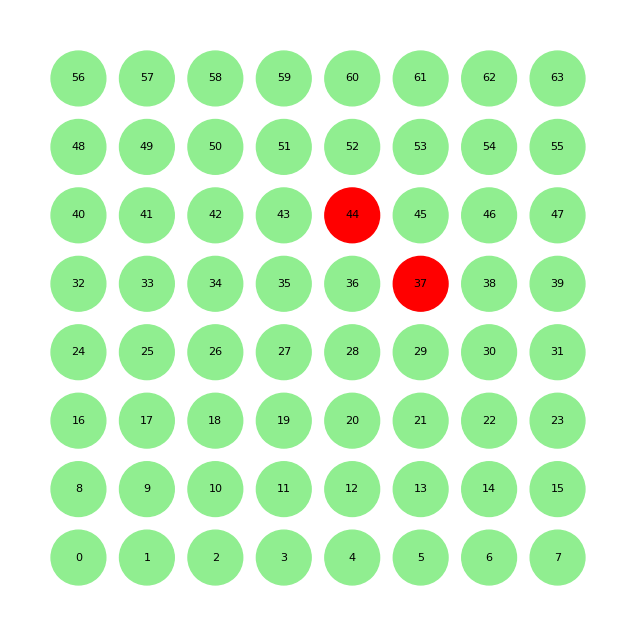

In [ ]:
import matplotlib.pyplot as plt

# Parameters for the mesh network
num_circles = 64  # Total circles in the mesh
grid_size = 8     # 8x8 mesh
highlight_indices = org_label[0] # Array of indices to highlight in red

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the mesh network
for i in range(num_circles):
    # Calculate position in the 8x8 grid (bottom-left indexing)
    row = (num_circles-1-i) // grid_size  # Row index (bottom to top)
    col = i % grid_size   # Column index (left to right)
    color = 'red' if i in highlight_indices else 'lightgreen'  # Highlight the specific circles in red
    circle = plt.Circle((col, row), radius=0.4, color=color, edgecolor='black')
    ax.add_artist(circle)
    # Add index as text
    ax.text(col, row, str(i), color='black', ha='center', va='center', fontsize=8)

# Set the plot limits and aspect ratio
ax.set_xlim(-1, grid_size)
ax.set_ylim(-1, grid_size)
ax.set_aspect('equal')
plt.gca().invert_yaxis()  # Invert y-axis to ensure bottom-left indexing
plt.axis('off')  # Turn off the axes
plt.show()